#### Project Goal : 
build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe to term deposit and thus increase their hit ratio.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
df = pd.read_csv('bank-full.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Attribute Description and possible data types:
##### Existing customers data:
1. age: *numerical integer* showing ages of existing customers  
2. job: Type of job categories (management, technician, entrepreneur, blue-collar, etc.). It is a norminal categorical data
3. marital: marital status (married, single, divorced). Data is norminal categorical 
4. education: education level (primary, secondary, tertiary). Data is ordinal categorical data
5. default: has credit in default? - A yes and No outcome. Data is norminal binary categorical data 
6. housing: has housing loan? - A yes and No outcome. Data is norminal binary categorical data
7. loan: has personal loan? - A yes and No outcome. Data is norminal binary categorical data
8. balance in account - what balance is in the customer account - Numerical integer 

##### Related to previous contact:
9. contact: contact communication type -(cellular, telephone and unknown) - norminal Categorical data
10. month: last contact month of year customer was contacted - ordinal categorical data
11. day: last contact day of the month. Numerical integer 
12. duration: last contact duration, in seconds. Numerical integer

##### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client - Numerical integer 
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days) - numerical integer
15. previous: number of contacts performed before this campaign and for this client - Numerical integer 
16. poutcome: outcome of the previous marketing campaign (Failure, success, others, unknwon etc). norminal Categorical data

##### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No). norminal Categorical data

### Exploratory data quality report

### EDA

In [34]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [35]:
df.isnull().values.any() # check for null values

False

In [36]:
df.shape

(45211, 17)

In [37]:
df.describe(). transpose() # for numerical features 

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


The *balance* variables have a negative minimum balance, this might be an input error and needs to be a positive value 

In [38]:
df['balance'] = df['balance'].abs() # convert balance to positive 

##### To enable a quick insight and understanding on the data, we will first change the binary categories and proceed with some visualizations 

In [39]:
Binary_cat = {   'default': {'yes': 1, 'no': 0},
                 'housing': {'yes': 1, 'no': 0},
                 'loan': {'yes': 1, 'no': 0},
                 'Target': {'yes': 1, 'no': 0},
                    }
df=df.replace(Binary_cat)  # replace with dictionary 
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [40]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [41]:
df.groupby('Target').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.838986,0.019112,1360.464130,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1828.319342,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


#### Observations based on the numerical independednt variables shows the following:
1. Customers within higher age bracket subscribed more to the term deposit than those on lower age bracket
2. Customers with higher account balance would subscribe or buy the term deposit 
4. Customers with higher last contact duration of calls subscribed more to term deposit. The longer the time on calls, the higher the chance of conviction to buy
5. surprisingly, the number of days that passed by after the client was last contacted from a previous campaign (pdays) was higher for customers that subscribed to the term deposit. 
6. As expected, number of contacts performed before this campaign and for this client (previous) was higher for those that bought the term deposit. They must have gotten more briefings about the campaign.

## Univariate Analysis 

### Visualizations 

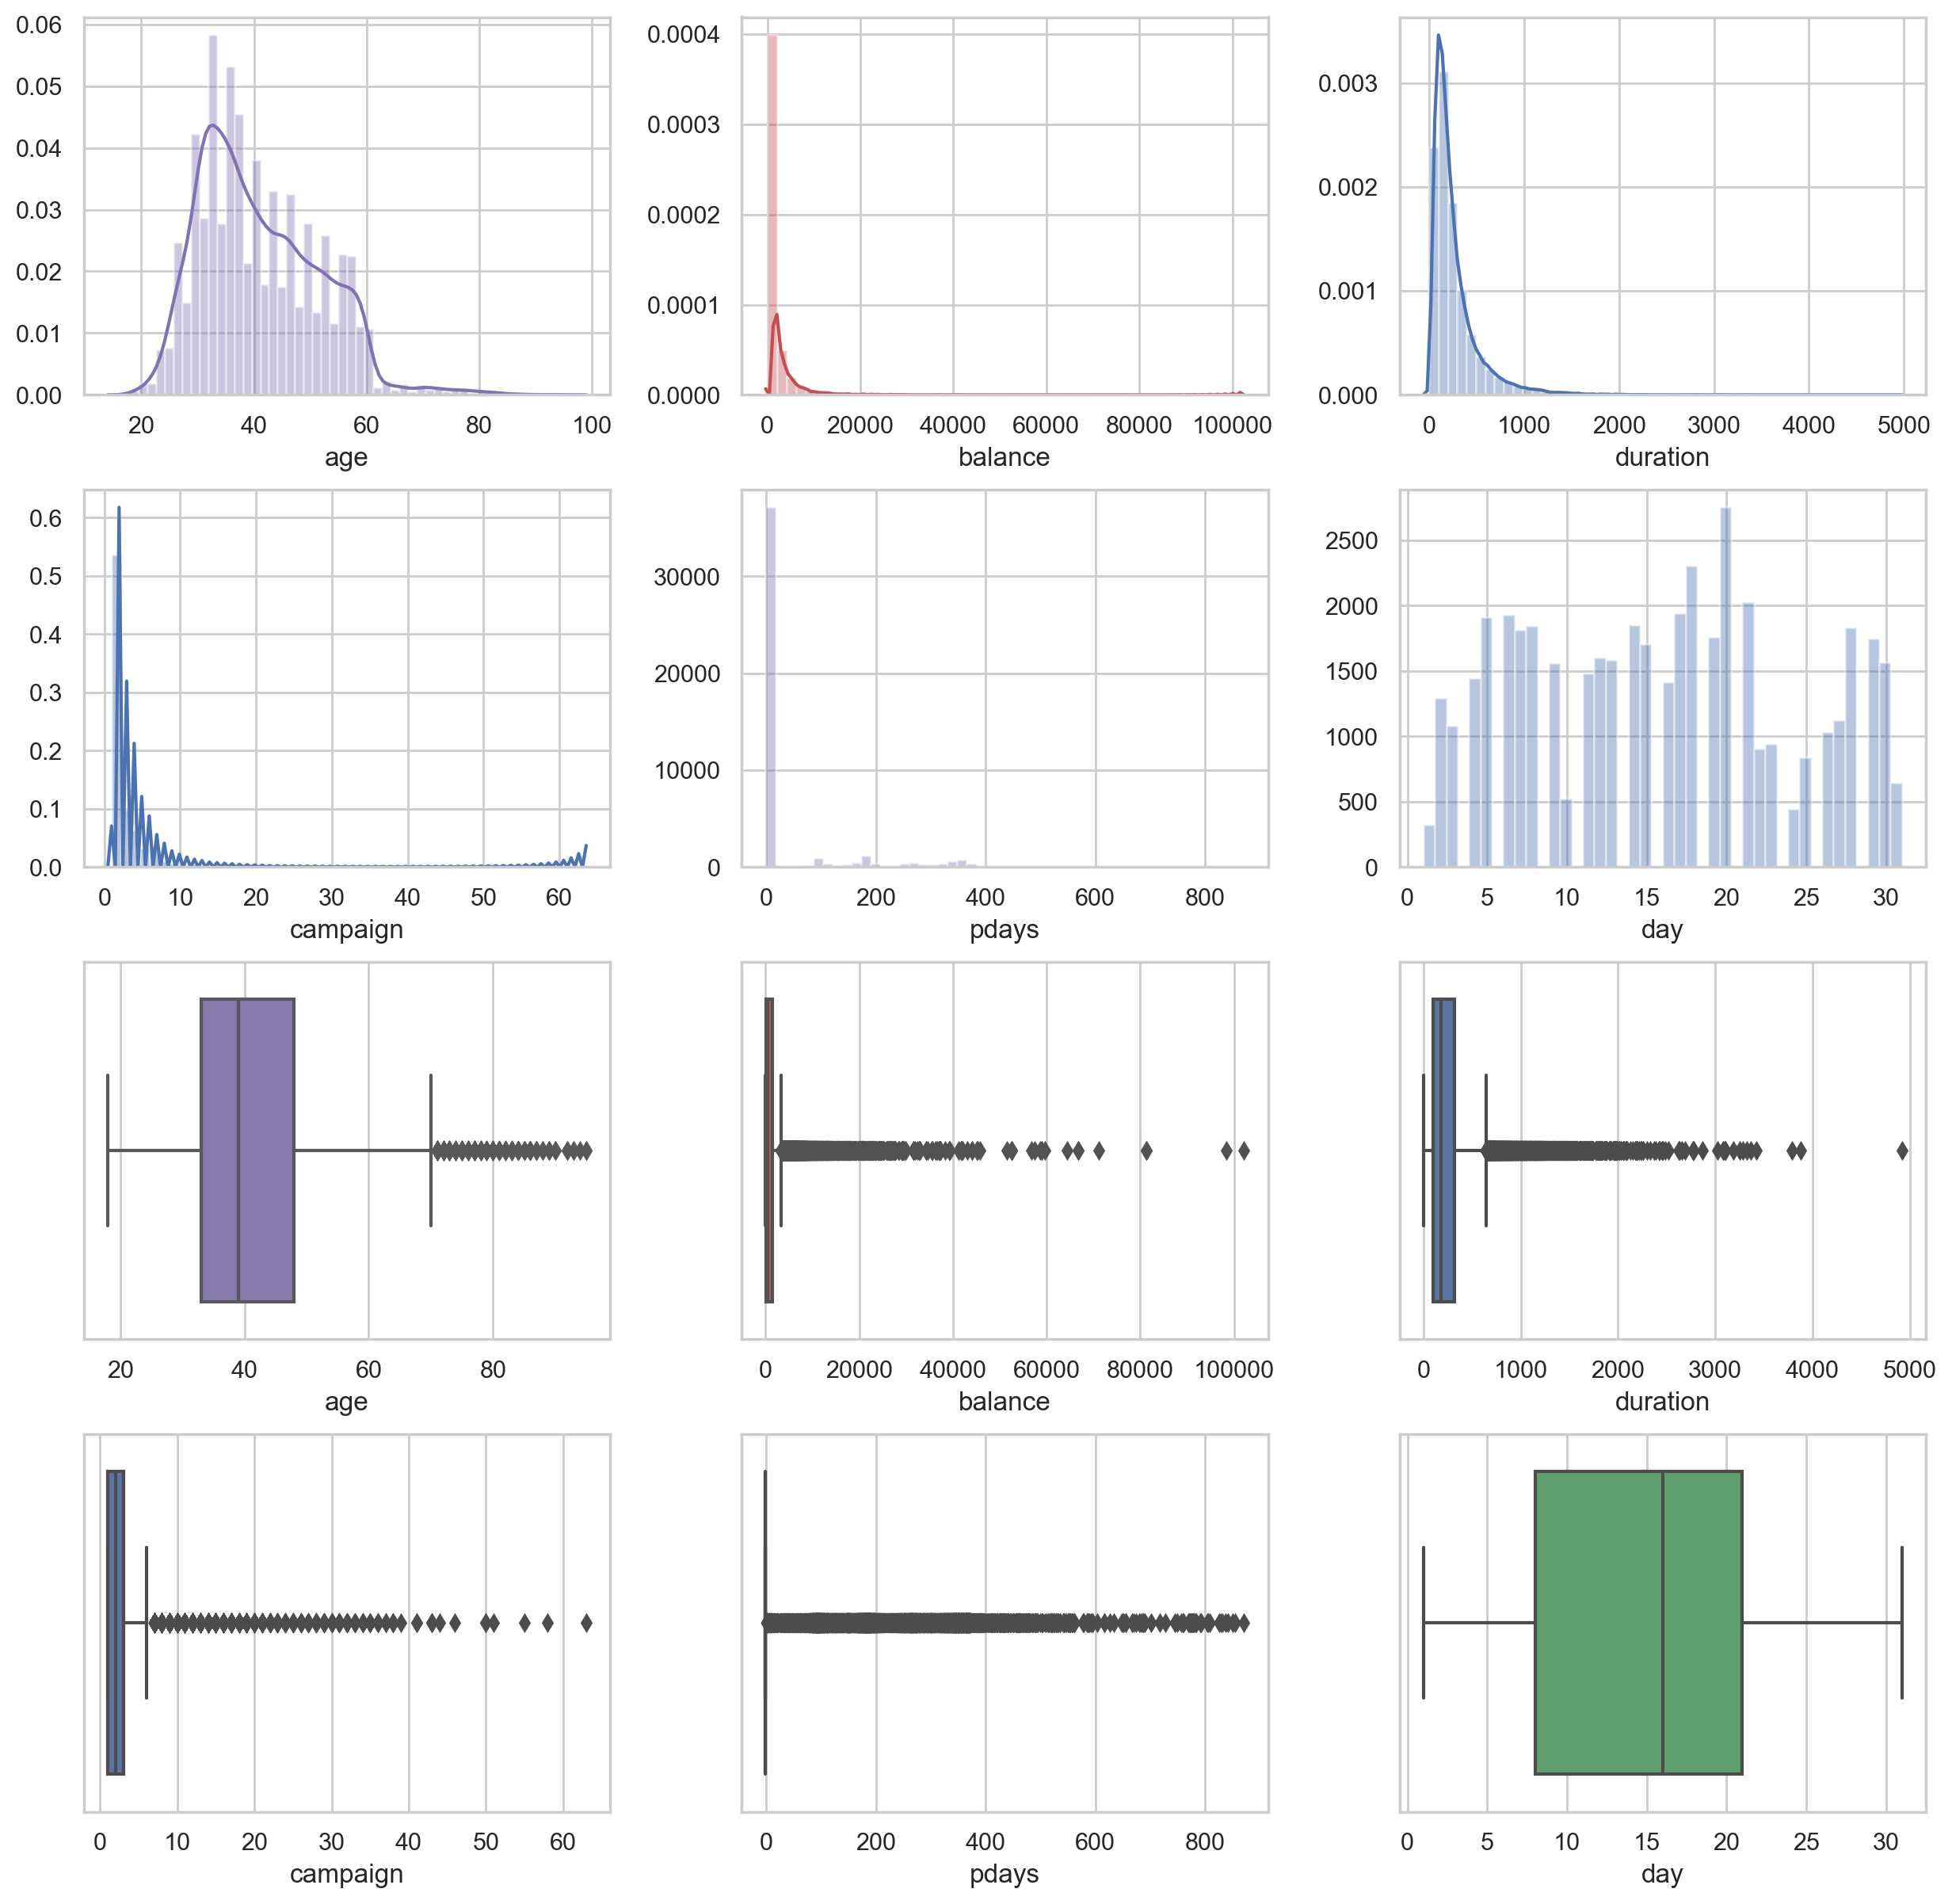

In [42]:
fig = plt.figure(figsize=[15,15], dpi=200)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
sns.set_style("whitegrid")

ax = fig.add_subplot(4, 3, 1)
sns.distplot(df['age'],ax=ax, color='m');

ax = fig.add_subplot(4, 3, 2)
sns.distplot(df['balance'],ax=ax, color='r');


ax = fig.add_subplot(4, 3, 3)
sns.distplot(df['duration'],ax=ax, color='b');

ax = fig.add_subplot(4, 3, 4)
sns.distplot(df['campaign'],ax=ax, color='b');

ax = fig.add_subplot(4, 3, 5)
sns.distplot(df['pdays'],ax=ax, color='m', kde=False);

ax = fig.add_subplot(4, 3, 6)
sns.distplot(df['day'],ax=ax, color='b',kde=False);

# Corresponding box plots 
ax = fig.add_subplot(4, 3, 7)
sns.boxplot(df['age'],ax=ax, color='m')


ax = fig.add_subplot(4, 3, 8)
sns.boxplot(df['balance'],ax=ax, color='r')


ax = fig.add_subplot(4, 3, 9)
sns.boxplot(df['duration'],ax=ax, color='b')

ax = fig.add_subplot(4, 3, 10)
sns.boxplot(df['campaign'],ax=ax, color='b')

ax = fig.add_subplot(4, 3, 11)
sns.boxplot(df['pdays'],ax=ax, color='g')

ax = fig.add_subplot(4, 3, 12)
sns.boxplot(df['day'],ax=ax, color='g')

#### Observation on Univariate plots 
Apart from independent variable 'days', all other numerical independent variables are heavily skewed to the right showing an unbalanced situation. Features scaling might be explored subsequenly depending on the outcome of the model scores. 

###### 'pdays' variable is highly skewed, due to high frequency of one single entry. This variable shall be explored more as follows:
1. Find the number of occurance of the highest frequency data based on our 'Target' variable
2. Find the percentage of the data dominated by this entry 

In [43]:
# number of yes(1) and no(0) given the 'pdays' variable highest entry value of -1
a1 = df[df['pdays'] == -1]
a1 = a1['pdays'].value_counts()
a = a1.to_string(index=False)
print('Number of rows with clients not contacted for a very long time from a previous campaign (variable pdays=-1) is =',a)
print()
print('number of rows in table', len(df))
print()
print('percentage of rows/data dominated by customers not contacted in percentage % is {}'.format(((a1*100/len(df)).to_list())))

df.loc[df['pdays'] == -1, 'Target'].value_counts().to_frame(name = 'pdays entry=-1 for Target variable 0 & 1')

Number of rows with clients not contacted for a very long time from a previous campaign (variable pdays=-1) is =  36954

number of rows in table 45211

percentage of rows/data dominated by customers not contacted in percentage % is [81.73674548229413]


,pdays entry=-1 for Target variable 0 & 1
0,33570
1,3384


The table above shows that about 10% of client not contacted after the previous campaign (beyond 900 days) were able to subscribe to the term deposit

#### Analysis of the categorical variables 

0    39922
1     5289
Name: Target, dtype: int64


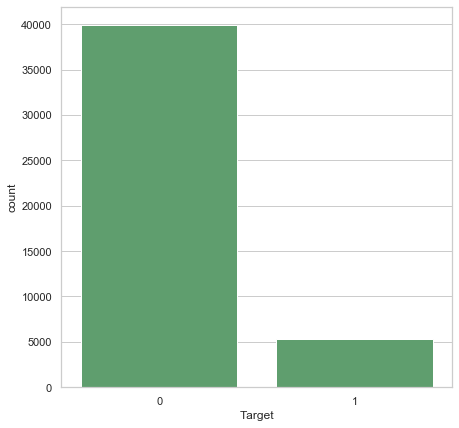

In [44]:
cnt = df['Target'].value_counts()
print(cnt)

fig = plt.figure(figsize=[7,7])
sns.countplot(df['Target'], color='g');

The Target is not balance and would require good model that can capture the sensitivity or Recall.

### Bi-variate - Analysis 

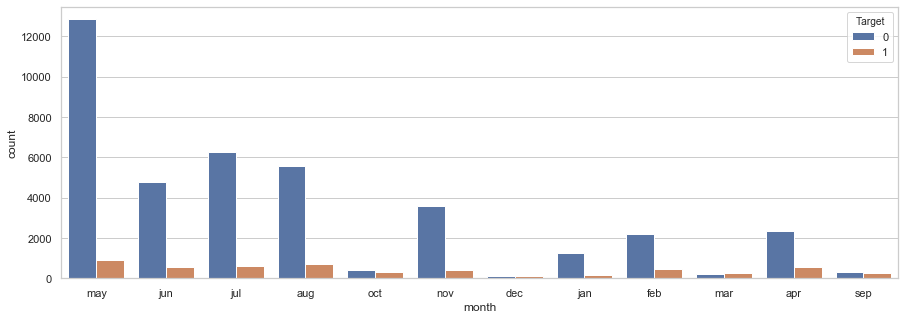

In [45]:
fig = plt.figure(figsize=[15,5])
sns.set_style('whitegrid')
sns.countplot(df['month'], hue=df['Target']);

Months of the year seems to be a good predictor of the target variable. Most customers subscribed to term deposit in the second quarter of the year than other period of the year. 

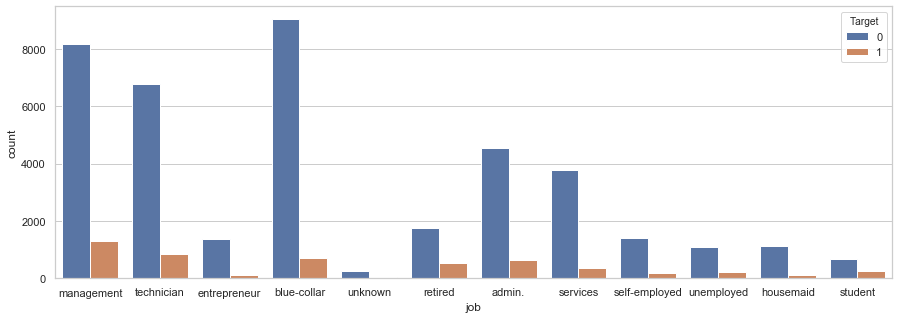

In [46]:
fig = plt.figure(figsize=[15,5])
sns.set_style('whitegrid')
sns.countplot(df['job'], hue=df['Target']);

Job title is a good predictor of the target dependent variable. Those with the management Job title subscribed more to the term deposit followed by the technicians

Target  marital 
0       married     24459
        single      10878
        divorced     4585
1       married      2755
        single       1912
        divorced      622
Name: marital, dtype: int64


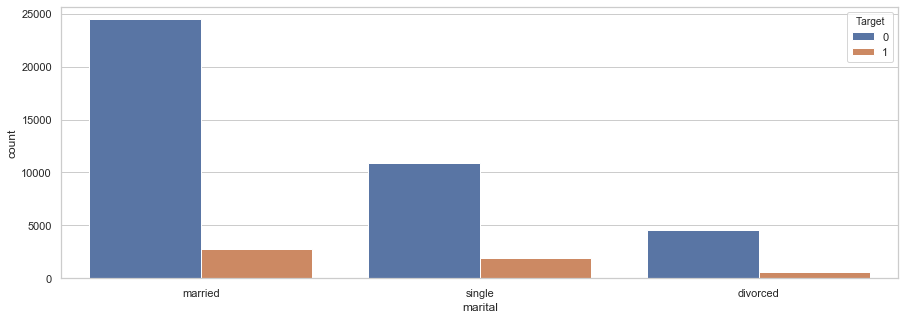

In [47]:
fig = plt.figure(figsize=[15,5])
sns.set_style('whitegrid')
sns.countplot(df['marital'], hue=df['Target']);
print(df.groupby(['Target'])['marital'].value_counts())

Marital Status is a good predictor of the target variable. More of those married went for the term deposit, followed by singles and the least are customers that are divorced. 

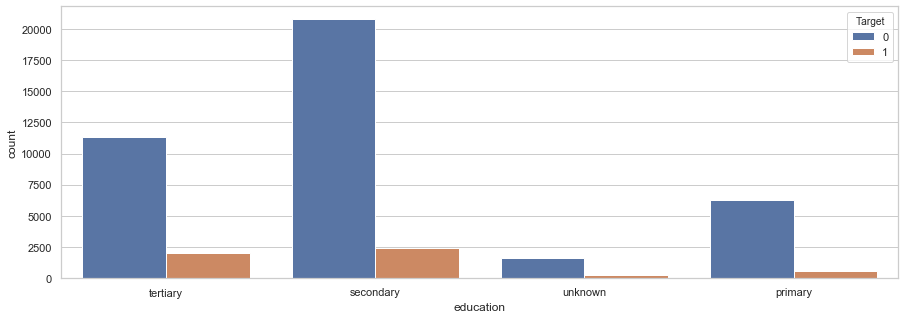

In [48]:
fig = plt.figure(figsize=[15,5])
sns.set_style('whitegrid')
sns.countplot(df['education'], hue=df['Target']);

Education seems to be a good predictor. Those in the tertiary & secondary education subscribed more to term deposit with most from secondary education. 

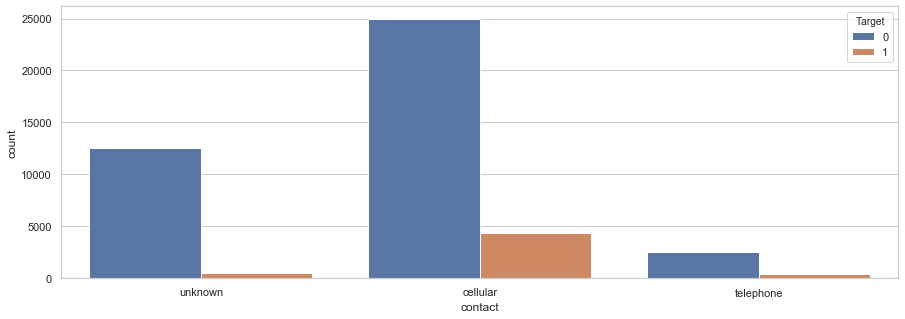

In [49]:
fig = plt.figure(figsize=[15,5])
sns.set_style('whitegrid')
sns.countplot(df['contact'], hue=df['Target']);

Type of contact is a good predictor as it shows that more of the client contacted by cellular subscribed to term deposit 

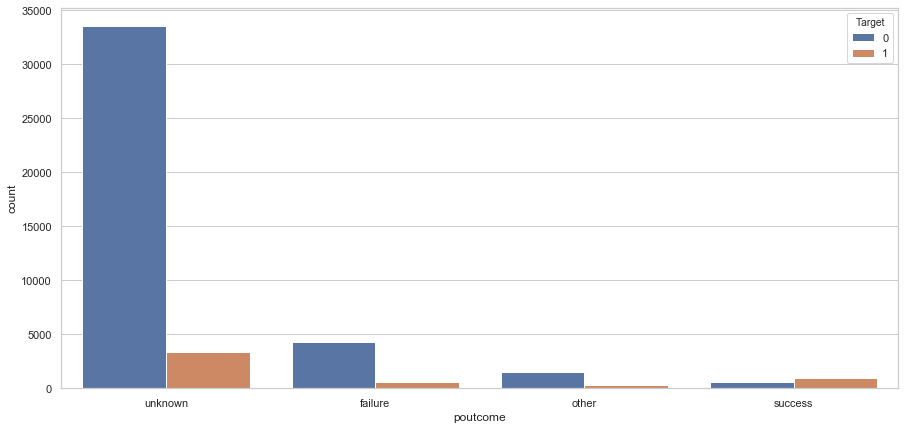

In [50]:
fig = plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(df['poutcome'], hue=df['Target']);

Poutcome could be a good predictor. Those customers with unknown outcome of the previous marketing campaign seems to subscribe the most.

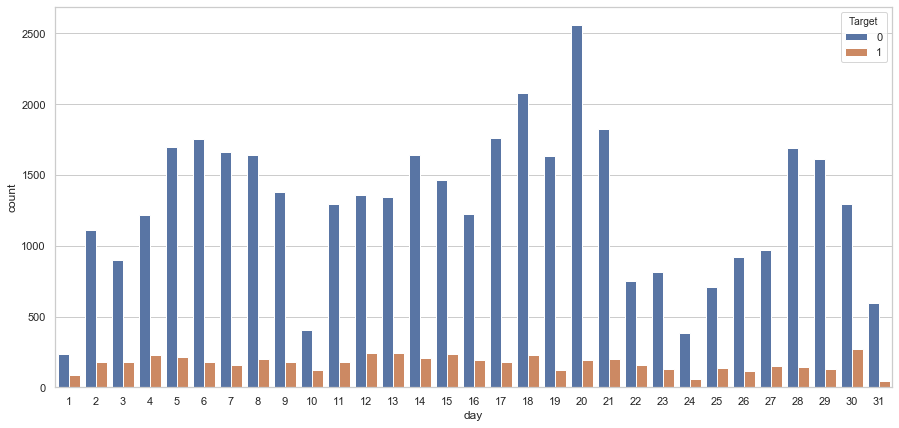

In [51]:
fig = plt.figure(figsize=[15,7])
sns.set_style('whitegrid')
sns.countplot(df['day'], hue=df['Target']);

day of the month might be a weak predictor as it is difficult to tell if some period is favourable or not for term deposit subscription

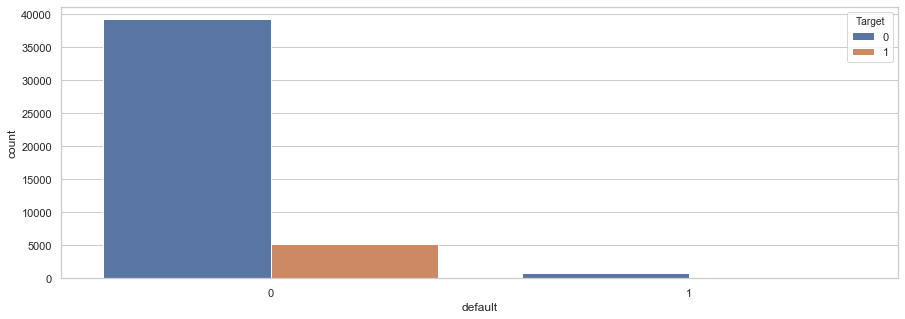

In [52]:
fig = plt.figure(figsize=[15,5])
sns.set_style('whitegrid')
sns.countplot(df['default'], hue=df['Target']);

No customer with default in credit subscribed to term deposit. This is expected. 

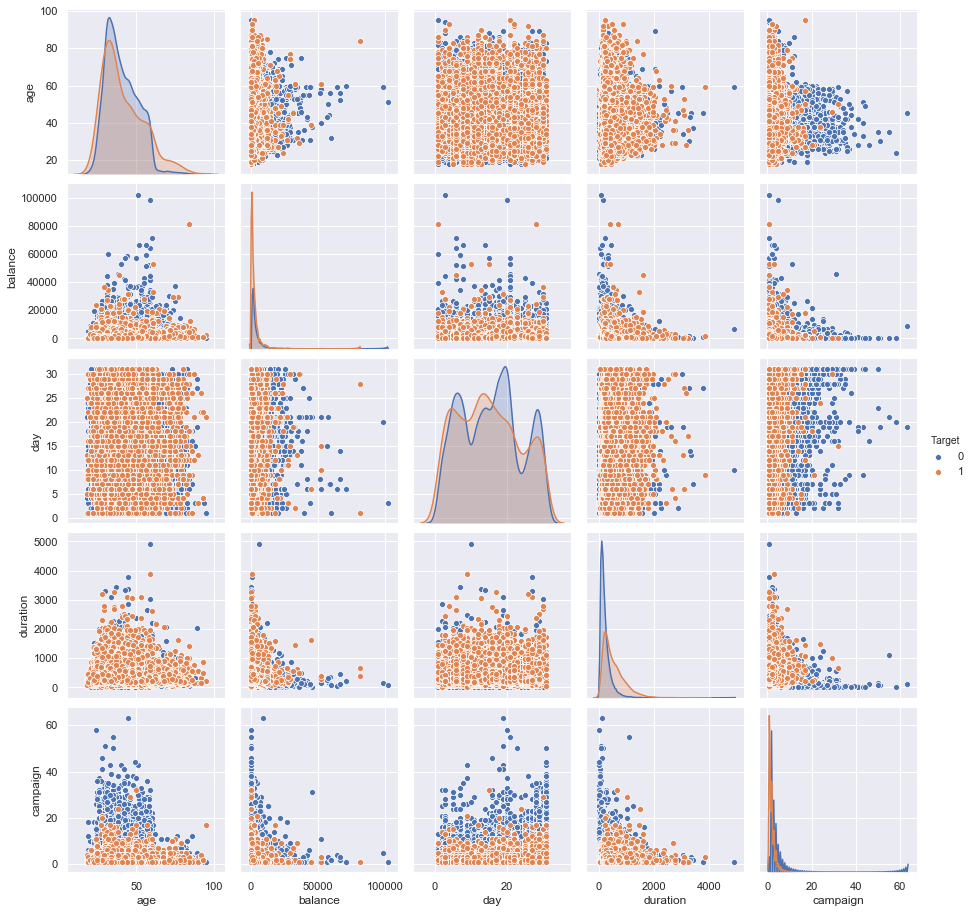

In [53]:
sns.set(style='darkgrid');
sns.pairplot(df[['age','balance','day','duration','campaign', 'Target']],hue = 'Target');  

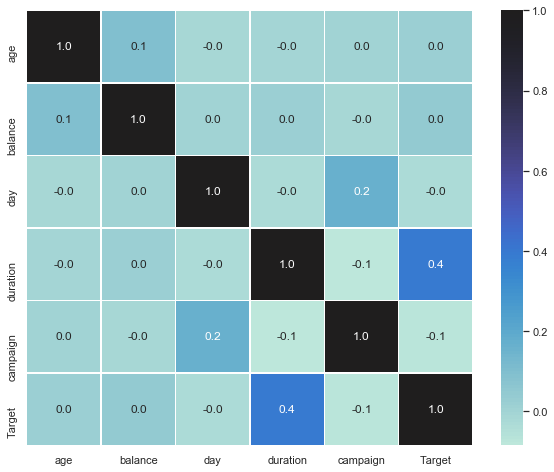

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['age','balance','day','duration','campaign', 'Target']].corr(),
            annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

these sets of variables are independent in their interactions  

## Preparing the data for analytics

##### The binary categorical independent variable  have been Label-Encoded already. We will focus on the multi-level categorical variable for encoding 

In [55]:
for feature in df.columns:                               # Loop through all columns in the dataframe
    if df[feature].dtype == 'object':                    # Only apply to columns with variables with strings content
        df[feature] = pd.Categorical(df[feature])        #change object to categorical type
df.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target          int64
dtype: object

#### Get a list of the categories in the categorical variables to enable efficient Enconding 

In [56]:
col = df.columns
for i in col:
    if df[i].dtype != 'int64':
          print(i)
          print(df[i].cat.categories)
          print()
          

job
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

marital
Index(['divorced', 'married', 'single'], dtype='object')

education
Index(['primary', 'secondary', 'tertiary', 'unknown'], dtype='object')

contact
Index(['cellular', 'telephone', 'unknown'], dtype='object')

month
Index(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

poutcome
Index(['failure', 'other', 'success', 'unknown'], dtype='object')



#### Variable Encoding 

- The variable labels have both the ordinal and norminal categorical types 
- "Education" column will be treated as ordinal data type with defined ordering. 
- 'job','marital','contact','month','poutcome' are all norminal categorical variables as the ordering is not defined. 
- OneHot encoding will be used for norminal variables with 3 categories. 

In [57]:
replace_cat = {
                 'education': {'primary': 1, 'secondary':2 , 'tertiary': 3, 'unknown': -1},
                    }


oneHotCols=['job','marital','contact','month','poutcome']

In [177]:
df1=df.replace(replace_cat)                 #re-assign values as stated in the dictionary definitions above 
df1=pd.get_dummies(df1, columns=oneHotCols, drop_first=True)  #execute one-hot encoding for the specified variables and drop the
                                                            # the the irrelevant extra columns (drop_first = True)
    
                                                              # change negative to positives
df1.head(2)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,261,1,-1,...,0,0,0,1,0,0,0,0,0,1
1,44,2,0,29,1,0,5,151,1,-1,...,0,0,0,1,0,0,0,0,0,1


In [178]:
df1.shape

(45211, 41)

The number of independent variable have increased from 17 to 41 due to one hot encoding. Nevertheless, the length of the data is enough to compensate for the increase in features. The problem of Bias or Variance would be handled 

### Prepare the data for analytics

The table as it is would be used for training, then improved upon if necessary based on model performance output

### best logistic regression model choice. 

#### due to the unbalanced nature of the data, before proceeding to getting the right Logist regression model, some iterations would be ran on the hyper-parameters to ensure the model captures this data effectively. The following shall be considered
1. Iterations on solvers.
2. penalty = 'l2' for regularisation.
3. C = (inverse of regularization strength) would be reduced to ensure stronger regularization. 
4. class_weight would be set to = 'balanced'. The "balanced" mode uses the values of Target variable to automatically adjust weights inversely proportional to class frequencies in the input data.
5. max_iter would be varied to ensure convergence of solvers


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
X = df1.drop('Target', axis=1)  
y = df1['Target']     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train.shape, X_test.shape

((31647, 40), (13564, 40))

In [180]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [181]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
Recall_score =[]
Precision_score = []
F1_Score = []

solver = ['newton-cg','lbfgs','liblinear','sag','saga']

for i in solver:
        model_s = LogisticRegression(random_state=22,penalty='l2', C = 0.5, solver=i , max_iter=200, class_weight='balanced') 
        model_s.fit(X_train, y_train)     
        train_score.append(round(model_s.score(X_train, y_train),3))
        test_score.append(round(model_s.score(X_test, y_test),3))
        y_predict_solver = model_s.predict(X_test)
        Recall_score.append(round(recall_score(y_test,y_predict_solver),3))
        Precision_score.append(round(precision_score(y_test,y_predict_solver),3))
        F1_Score.append(round(f1_score(y_test,y_predict_solver),3))
    
print('solvers', solver)
print()
print('training score',train_score)
print()
print('testing score',test_score)
print()
print('Recall', Recall_score)
print()
print('Precision', Precision_score)
print()
print('F1 score', F1_Score)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


solvers ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

training score [0.844, 0.82, 0.844, 0.648, 0.54]

testing score [0.844, 0.82, 0.844, 0.647, 0.543]

Recall [0.82, 0.818, 0.821, 0.824, 0.902]

Precision [0.416, 0.377, 0.416, 0.225, 0.192]

F1 score [0.552, 0.516, 0.553, 0.354, 0.317]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


##### Liblinear seems to perform well on the data with good Recall and No over fitting. The 'sag' solver did not converge. 

#### Checking improvement using the hyper-parameter value C. 

In [182]:
train_score=[]
test_score=[]
Recall_score =[]
Precision_score = []
F1_Score = []

Inverse_of_regularization_strength = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in Inverse_of_regularization_strength:
        model_s = LogisticRegression(random_state=22,penalty='l2', C = i, solver='liblinear', 
                                     max_iter=200, class_weight='balanced') 
        model_s.fit(X_train, y_train)     
        train_score.append(round(model_s.score(X_train, y_train),3))
        test_score.append(round(model_s.score(X_test, y_test),3))
        y_predict_solver = model_s.predict(X_test)
        Recall_score.append(round(recall_score(y_test,y_predict_solver),3))
        Precision_score.append(round(precision_score(y_test,y_predict_solver),3))
        F1_Score.append(round(f1_score(y_test,y_predict_solver),3))
    
print('Inverse of regularization strength ', Inverse_of_regularization_strength)
print()
print('training score',train_score)
print()
print('testing score',test_score)
print()
print('Recall', Recall_score)
print()
print('Precision', Precision_score)
print()
print('F1 score', F1_Score)

Inverse of regularization strength  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

training score [0.844, 0.844, 0.843, 0.844, 0.844, 0.844, 0.844, 0.844, 0.844, 0.844]

testing score [0.844, 0.844, 0.844, 0.844, 0.844, 0.844, 0.844, 0.844, 0.844, 0.844]

Recall [0.822, 0.821, 0.821, 0.82, 0.821, 0.82, 0.82, 0.821, 0.82, 0.821]

Precision [0.416, 0.416, 0.416, 0.416, 0.416, 0.416, 0.416, 0.417, 0.417, 0.416]

F1 score [0.552, 0.552, 0.553, 0.552, 0.553, 0.552, 0.552, 0.553, 0.552, 0.552]


#### Inverse of regularization strength have minimal impact on the scores. Using F1 score for selection, a C = 0.3 will be selected.

#### Summary on model selection. 
the following model hyper-parameter would be chosen to run the model
1. Solver = 'liblinear'
2. C = 0.3
3. Penalty = 'l2'
4. class_weight='balanced'
5. max_iter= default value since we are using liblinear

## Logistic Regression Model (M1)

In [183]:
logreg = LogisticRegression(solver='liblinear',random_state=22, penalty='l2', class_weight='balanced',max_iter=100, C=0.3)
logreg.fit(X_train, y_train)

#predict on test
y_predict = logreg.predict(X_test)

In [184]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8434922741492085

Testing accuracy 0.8440725449719847

Confusion Matrix


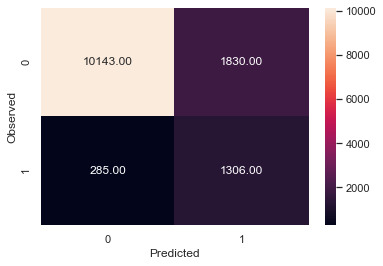

None

Recall: 0.8208673790069139

Precision: 0.4164540816326531

F1 Score: 0.5525703405965728

Roc Auc Score: 0.8340117401173381


In [185]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#### The above model performance is okay with a good fair Recall. Below is a summary of explanations
- high recall + high precision : the class is perfectly handled by the model
- low recall + high precision : the model can’t detect the class well but is highly trustable when it does
- high recall + low precision : the class is well detected but the model also include points of other classes in it
- low recall + low precision : the class is poorly handled by the model

#### Statistical Analysis of Logistic Regression Results for parameter impacts 

In [186]:
import statsmodels.api as sm
from scipy import stats
#Build the logistic regression model
logit = sm.Logit(y_train, sm.add_constant(X_train.astype(float)))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.237396
         Iterations 8


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [187]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31606
Method:                           MLE   Df Model:                           40
Date:                Sat, 30 May 2020   Pseudo R-squ.:                  0.3417
Time:                        01:33:19   Log-Likelihood:                -7512.9
converged:                       True   LL-Null:                       -11412.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3602      0.215    -10.965      0.000      -2.782      -1.938
age                  -0.0021      0.003     -0.798      0.425      -0.007       0.003
education             0.

Due to the larger number of features involve, some features would be eliminated using a P-value treshold of 5% (0.05). The following variables would be dropped.
1. age
2. default
3. pdays
4. previous
5. job_management
6. job_unemployed
7. job_unknown
8. marital_single 
9. contact_telephone
10. month_feb
11. poutcome_other
12. poutcome_unknown

A total of 12 variables would be dropped based on the statistics.

### Logistic regression assement based on droppeding some independent variables that are not relevant to the system

In [188]:
df2 = df1.drop(['default','pdays','poutcome_unknown','age','previous','job_management',
                'job_unemployed','job_unknown','marital_single','contact_telephone',
               'month_feb','poutcome_other','poutcome_unknown'], axis=1)

df2.shape

(45211, 29)

In [189]:
X1 = df2.drop('Target', axis=1)  
y1 = df2['Target']     

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=22)
X_train.shape, X_test.shape 

((31647, 28), (13564, 28))

In [190]:
model1 = LogisticRegression(solver='liblinear',random_state=22, penalty='l2', class_weight='balanced',max_iter=100, C=0.3)
model1.fit(X_train, y_train)

#predict on test
y_predict1 = model1.predict(X_test)

Trainig accuracy 0.8436818655796758

Testing accuracy 0.8448835151872603

Confusion Matrix


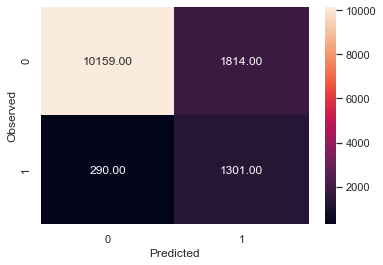

None

Recall: 0.8177247014456317

Precision: 0.4176565008025682

F1 Score: 0.5529111772205696

Roc Auc Score: 0.8331085713859746


In [191]:
print("Trainig accuracy",model1.score(X_train,y_train))  
print()
print("Testing accuracy",model1.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict1))
print()
print("Recall:",recall_score(y_test,y_predict1))
print()
print("Precision:",precision_score(y_test,y_predict1))
print()
print("F1 Score:",f1_score(y_test,y_predict1))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict1))

##### The parameter screening did not impact the logistic regression. This will be important when using DT/ Esenmble models for minimal dimentionality problems. 

### Decision Tree 

### Running some initial checks to make a better choice of tuning parameters in DT algorithm.

In [192]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn import tree

In [193]:
train_score=[]
test_score=[]
Recall_score =[]
Precision_score = []
F1_Score = []

max_depth = [1,2,3, 4, 5, 6, 7, 8, 9, 10, 11]

for i in max_depth:
        Dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=i, class_weight='balanced',
                                       random_state=22)
        Dtree.fit(X_train, y_train) 
        y_predict_Dtree = Dtree.predict(X_test)     
        train_score.append(round(Dtree.score(X_train, y_train),3))
        test_score.append(round(Dtree.score(X_test, y_test),3))
        Recall_score.append(round(recall_score(y_test,y_predict_Dtree),3))
        Precision_score.append(round(precision_score(y_test,y_predict_Dtree),3))
        F1_Score.append(round(f1_score(y_test,y_predict_Dtree),3))
    


print('max_depth', max_depth)
print()
print('training score',train_score)
print()
print('testing score',test_score)
print()
print('Recall', Recall_score)
print()
print('Precision', Precision_score)
print()
print('F1 score', F1_Score)

max_depth [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

training score [0.638, 0.637, 0.723, 0.723, 0.816, 0.823, 0.809, 0.821, 0.826, 0.846, 0.855]

testing score [0.636, 0.635, 0.717, 0.718, 0.811, 0.818, 0.8, 0.806, 0.808, 0.823, 0.825]

Recall [0.833, 0.879, 0.878, 0.881, 0.804, 0.81, 0.825, 0.838, 0.83, 0.817, 0.799]

Precision [0.221, 0.227, 0.277, 0.278, 0.363, 0.373, 0.35, 0.36, 0.361, 0.381, 0.382]

F1 score [0.35, 0.361, 0.422, 0.423, 0.5, 0.511, 0.492, 0.504, 0.503, 0.519, 0.517]


#### using 'gini' index with Max_depth of 4 seems good on Recall, however there is a drop in precision with minimal over-fit

#### progressing with the D-Tree building. 

In [194]:
#splitting 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=22)
X_train.shape, X_test.shape

((31647, 28), (13564, 28))

In [195]:
dTree_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=4, class_weight='balanced',random_state=22)

In [196]:
dTree_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [197]:
y_predict_gini =dTree_gini.predict(X_test)

Trainig accuracy 0.723228110089424

Testing accuracy 0.7181509879091713

Confusion Matrix


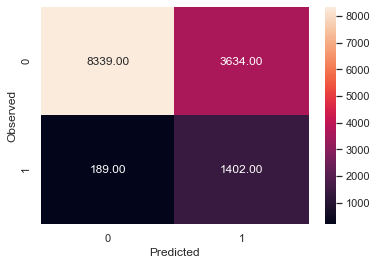

None

Recall: 0.8812067881835324

Precision: 0.278395552025417

F1 Score: 0.4231175494190433

Roc Auc Score: 0.7888452716496047


In [198]:
print("Trainig accuracy",dTree_gini.score(X_train,y_train))  
print()
print("Testing accuracy",dTree_gini.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict_gini))
print()
print("Recall:",recall_score(y_test,y_predict_gini))
print()
print("Precision:",precision_score(y_test,y_predict_gini))
print()
print("F1 Score:",f1_score(y_test,y_predict_gini))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_gini))

- high recall + high precision : the class is perfectly handled by the model
- low recall + high precision : the model can’t detect the class well but is highly trustable when it does
- high recall + low precision : the class is well detected but the model also include points of other classes in it
- low recall + low precision : the class is poorly handled by the model

#### Visualizing the Tree

In [199]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

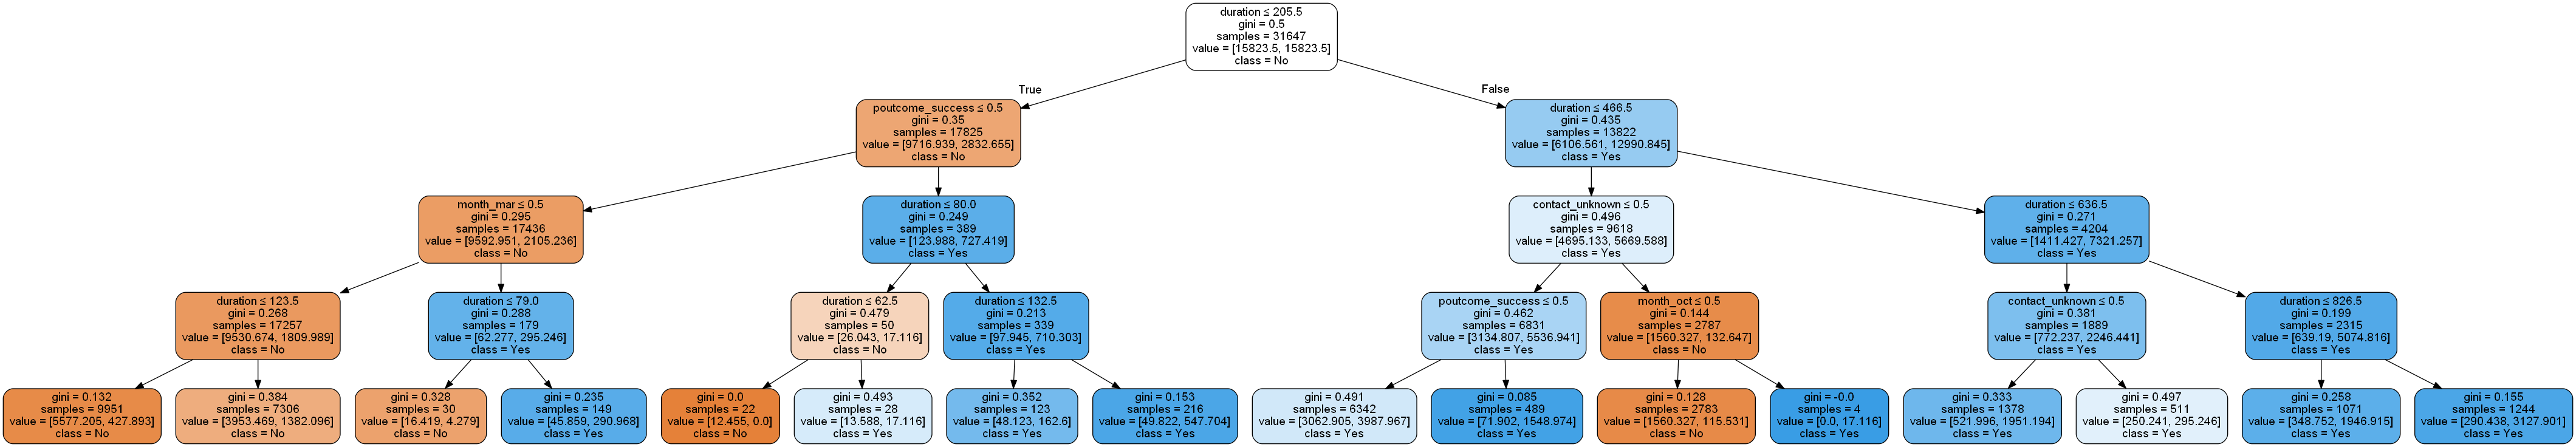

In [200]:
train_char_label = ['No', 'Yes']
dot_data = StringIO()
export_graphviz(dTree_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X_train),class_names=list(train_char_label))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [201]:
## Calculating feature importance
feat_importance = dTree_gini.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(list(X_train), dTree_gini.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.640105
poutcome_success,0.168134
contact_unknown,0.141298
month_mar,0.046065
month_oct,0.004398
marital_married,0.000000
month_sep,0.000000
month_nov,0.000000
month_may,0.000000
month_jun,0.000000


##### From the important features table above we can infer that the last duration of contact with customers, how successful or unsuccessful the previous campaign outcome is, customers with unknown contact, month of march and october when the cutomers where contacted are the major impact variables. 

### Ensemble models 

### Applying Adaboost Ensemble Algorithm

In [202]:
from sklearn.ensemble import AdaBoostClassifier

In [203]:
train_score=[]
test_score=[]
Recall_score =[]
Precision_score = []
F1_Score = []

n_estimators = [50, 200, 1000]

for i in n_estimators:
        boost = AdaBoostClassifier(n_estimators = i, learning_rate=1, random_state=22)
        boost.fit(X_train, y_train) 
        y_predict_AB =boost.predict(X_test)     
        train_score.append(round(boost.score(X_train, y_train),3))
        test_score.append(round(boost.score(X_test, y_test),3))
        Recall_score.append(round(recall_score(y_test,y_predict_AB),3))
        Precision_score.append(round(precision_score(y_test,y_predict_AB),3))
        F1_Score.append(round(f1_score(y_test,y_predict_AB),3))
    


print('max_depth', n_estimators)
print()
print('training score',train_score)
print()
print('testing score',test_score)
print()
print('Recall', Recall_score)
print()
print('Precision', Precision_score)
print()
print('F1 score', F1_Score)

max_depth [50, 200, 1000]

training score [0.902, 0.904, 0.905]

testing score [0.901, 0.9, 0.899]

Recall [0.393, 0.379, 0.369]

Precision [0.624, 0.622, 0.612]

F1 score [0.482, 0.471, 0.46]


##### number of estimator and chnages in learning rate was done. the default learning rate of 1 and any number of gives similar result.  

In [204]:
ADA_model = AdaBoostClassifier(n_estimators = 50, learning_rate=1, random_state=22)
ADA_model = ADA_model.fit(X_train, y_train)

In [205]:
y_pred_ADA =ADA_model.predict(X_test)

Trainig accuracy 0.9018864347331501

Testing accuracy 0.9009879091713359

Confusion Matrix


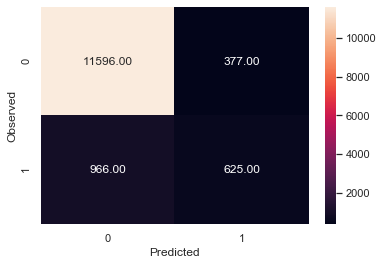

None

Recall: 0.3928346951602766

Precision: 0.6237524950099801

F1 Score: 0.4820671037408407

Roc Auc Score: 0.6806735907940362


In [206]:
print("Trainig accuracy",ADA_model.score(X_train,y_train))  
print()
print("Testing accuracy",ADA_model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_pred_ADA))
print()
print("Recall:",recall_score(y_test,y_pred_ADA))
print()
print("Precision:",precision_score(y_test,y_pred_ADA))
print()
print("F1 Score:",f1_score(y_test,y_pred_ADA))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred_ADA))

### Applying Gradient Boosting Ensemble Algorithm

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
train_score=[]
test_score=[]
Recall_score =[]
Precision_score = []
F1_Score = []

n_estimators = [50, 200, 400]

for i in n_estimators:
        gradboost = GradientBoostingClassifier(n_estimators = i, learning_rate=1, random_state=22)
        gradboost.fit(X_train, y_train) 
        ypredict =gradboost.predict(X_test)     
        train_score.append(round(gradboost.score(X_train, y_train),3))
        test_score.append(round(gradboost.score(X_test, y_test),3))
        Recall_score.append(round(recall_score(y_test,ypredict),3))
        Precision_score.append(round(precision_score(y_test,ypredict),3))
        F1_Score.append(round(f1_score(y_test,ypredict),3))
    


print('max_depth', n_estimators)
print()
print('training score',train_score)
print()
print('testing score',test_score)
print()
print('Recall', Recall_score)
print()
print('Precision', Precision_score)
print()
print('F1 score', F1_Score)

max_depth [50, 200, 400]

training score [0.919, 0.942, 0.961]

testing score [0.906, 0.902, 0.897]

Recall [0.454, 0.471, 0.476]

Precision [0.64, 0.607, 0.573]

F1 score [0.532, 0.531, 0.52]


In [209]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [210]:
pred_GB = gbcl.predict(X_test)

Trainig accuracy 0.9186020791860208

Testing accuracy 0.9060749041580655

Confusion Matrix


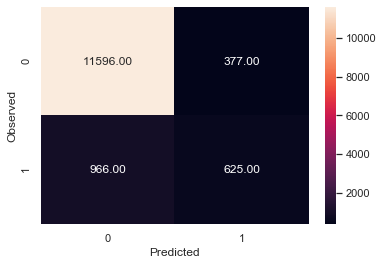

None

Recall: 0.4544311753614079

Precision: 0.6403897254207263

F1 Score: 0.5316176470588236

Roc Auc Score: 0.7102607726802862


In [211]:
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print()
print("Testing accuracy",gbcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_pred_ADA))
print()
print("Recall:",recall_score(y_test,pred_GB))
print()
print("Precision:",precision_score(y_test,pred_GB))
print()
print("F1 Score:",f1_score(y_test,pred_GB))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred_GB))

##### There is a slight improvement of gradient boosting over Adaboosting

### Applying Bagging Classifier Algorithm 

In [212]:
from sklearn.ensemble import BaggingClassifier

In [213]:
train_score=[]
test_score=[]
Recall_score =[]
Precision_score = []
F1_Score = []

n_estimators = [10, 30, 50, 100]

for i in n_estimators:
        Bag = BaggingClassifier(n_estimators=i, max_samples=0.3, bootstrap=True, oob_score=True, random_state=22)
        Bag.fit(X_train, y_train) 
        ypredictb =Bag.predict(X_test)     
        train_score.append(round(Bag.score(X_train, y_train),3))
        test_score.append(round(Bag.score(X_test, y_test),3))
        Recall_score.append(round(recall_score(y_test,ypredictb),3))
        Precision_score.append(round(precision_score(y_test,ypredictb),3))
        F1_Score.append(round(f1_score(y_test,ypredictb),3))
    

print('n_estimators', n_estimators)
print()
print('training score',train_score)
print()
print('testing score',test_score)
print()
print('Recall', Recall_score)
print()
print('Precision', Precision_score)
print()
print('F1 score', F1_Score)

n_estimators [10, 30, 50, 100]

training score [0.937, 0.948, 0.951, 0.953]

testing score [0.899, 0.903, 0.905, 0.905]

Recall [0.382, 0.41, 0.431, 0.436]

Precision [0.615, 0.634, 0.64, 0.639]

F1 score [0.471, 0.498, 0.515, 0.518]


#### best max_sample of 0.3 and n_estimators of 50 would be used 

In [214]:
bagg = BaggingClassifier(n_estimators=50, max_samples= 0.3, bootstrap=True, oob_score=True, random_state=22)
bagg = bagg.fit(X_train, y_train)

In [215]:
y_predbagg = bagg.predict(X_test)

Trainig accuracy 0.9512434037981483

Testing accuracy 0.9048215865526393

Confusion Matrix


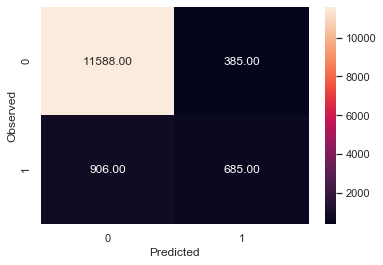

None

Recall: 0.4305468258956631

Precision: 0.6401869158878505

F1 Score: 0.5148440435926344

Roc Auc Score: 0.6991955711370907


In [216]:
print("Trainig accuracy",bagg.score(X_train,y_train))  
print()
print("Testing accuracy",bagg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predbagg))
print()
print("Recall:",recall_score(y_test,y_predbagg))
print()
print("Precision:",precision_score(y_test,y_predbagg))
print()
print("F1 Score:",f1_score(y_test,y_predbagg))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predbagg))

##### Aggregating all the metrics 

In [217]:
# logistics regression metrics 
TA_L = model1.score(X_train,y_train) 
TEA_L = model1.score(X_test, y_test) 
REC_L = recall_score(y_test,y_predict1)
PR_L = precision_score(y_test,y_predict1)
F1_L =f1_score(y_test,y_predict1)

In [218]:
# Decision Tree metrics 
TA_DT =dTree_gini.score(X_train,y_train)  
TEA_DT=dTree_gini.score(X_test, y_test)
REC_DT =recall_score(y_test,y_predict_gini)
PR_DT=precision_score(y_test,y_predict_gini)
F1_DT = f1_score(y_test,y_predict_gini)

In [219]:
#Adaboost Ensemble Algorithm metrics 
TA_AD = ADA_model.score(X_train,y_train) 
TEA_AD = ADA_model.score(X_test, y_test)
REC_AD = recall_score(y_test,y_pred_ADA)
PR_AD = precision_score(y_test,y_pred_ADA)
F1_AD = f1_score(y_test,y_pred_ADA)

In [222]:
# Gradient Boosting Ensemble metrics
TA_GR = gbcl.score(X_train,y_train) 
TEA_GB = gbcl.score(X_test, y_test)
REC_GB = recall_score(y_test,pred_GB)
PR_GB = precision_score(y_test,pred_GB)
F1_GB = f1_score(y_test,pred_GB)

In [225]:
# Bagging Classifier Algorithm metric
TA_BA = bagg.score(X_train,y_train)
TEA_BA=bagg.score(X_test, y_test)
REC_BA = recall_score(y_test,y_predbagg)
PR_BA =precision_score(y_test,y_predbagg)
F1_BA = f1_score(y_test,y_predbagg)

### Summary of Metrics In Data Frame 

In [226]:
result_logis = pd.DataFrame({'Method':['Logistics Regression '], 'Trainig accuracy': TA_L, 'Testing accuracy':TEA_L, 
                          'Recall':REC_L, 'Precision':PR_L, 'F1 Score':F1_L })


result_dTree = pd.DataFrame({'Method':['Decision Tree '], 'Trainig accuracy': TA_DT, 'Testing accuracy':TEA_DT, 
                          'Recall':REC_DT, 'Precision':PR_DT, 'F1 Score':F1_DT })


result_Ada = pd.DataFrame({'Method':['Adaboost Ensemble'], 'Trainig accuracy': TA_AD, 'Testing accuracy':TEA_AD, 
                          'Recall':REC_AD, 'Precision':PR_AD, 'F1 Score':F1_AD })


result_Grad = pd.DataFrame({'Method':['Gradient Boosting'], 'Trainig accuracy': TA_GR, 'Testing accuracy':TEA_GB, 
                          'Recall':REC_GB, 'Precision':PR_GB, 'F1 Score':F1_GB })


result_Bagg = pd.DataFrame({'Method':['Bagging Ensemble'], 'Trainig accuracy': TA_BA, 'Testing accuracy':TEA_BA, 
                          'Recall':REC_BA, 'Precision':PR_BA, 'F1 Score':F1_BA })




In [227]:
pd.concat([result_logis, result_dTree, result_Ada, result_Grad, result_Bagg  ])

,Method,Trainig accuracy,Testing accuracy,Recall,Precision,F1 Score
0,Logistics Regression,0.843682,0.844884,0.817725,0.417657,0.552911
0,Decision Tree,0.723228,0.718151,0.881207,0.278396,0.423118
0,Adaboost Ensemble,0.901886,0.900988,0.392835,0.623752,0.482067
0,Gradient Boosting,0.918602,0.906075,0.454431,0.640390,0.531618
0,Bagging Ensemble,0.951243,0.904822,0.430547,0.640187,0.514844


The above models would be judged based on the following assertions : 
- high recall + high precision : the class is perfectly handled by the model
- low recall + high precision : the model can’t detect the class well but is highly trustable when it does
- high recall + low precision : the class is well detected but the model also include points of other classes in it
- low recall + low precision : the class is poorly handled by the model

#### From the metric results displayed, the ensemble techniques yielded good precision, high testing and training accuracies but lower recall. This implies that the ensemble models can't detect the positive class (1) very well. 

#### Logistic regression stroke a balance between all the metrics with very good recall showing it can detect a lot of positives but also have negative class included. 

#### Decision tree have the highest Recall but lowest precision. Although it is great in detecing the positives, it has a lot of negatives included compared to Logistic regression. 

### In conclusion, Logistic regression is the best model as it stroke a balance looking at all the score metrics with best average (Best F1 Score)